In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install gplearn scikit-learn


In [ ]:
import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Paths to the CSV files
train_features_path = '/content/drive/MyDrive/ngsim 2/ngsim_v_dt=1/train_feature.csv'
train_labels_path = '/content/drive/MyDrive/ngsim 2/ngsim_v_dt=1/train_label.csv'
validation_features_path = '/content/drive/MyDrive/ngsim 2/ngsim_v_dt=1/validation_feature.csv'
validation_labels_path = '/content/drive/MyDrive/ngsim 2/ngsim_v_dt=1/validation_label.csv'

In [ ]:
# Loading the CSV files without headers, since we will set column names manually
train_features_df = pd.read_csv(train_features_path, header=None)
train_labels_df = pd.read_csv(train_labels_path, header=None)
validation_features_df = pd.read_csv(validation_features_path, header=None)
validation_labels_df = pd.read_csv(validation_labels_path, header=None)

In [ ]:
# Setting column names manually
train_features_df.columns = ['dx', 'dv', 'v']
train_labels_df.columns = ['v_next']
validation_features_df.columns = ['dx', 'dv', 'v']
validation_labels_df.columns = ['v_next']

In [ ]:
# Concatenating features and labels for training and validation sets
train_df = pd.concat([train_features_df, train_labels_df], axis=1)
validation_df = pd.concat([validation_features_df, validation_labels_df], axis=1)

In [ ]:
# Splitting features and labels
X_train = train_df[['dx', 'dv', 'v']]
y_train = train_df['v_next']
X_validation = validation_df[['dx', 'dv', 'v']]
y_validation = validation_df['v_next']

In [ ]:
symbolic_regressor = SymbolicRegressor(
    population_size=10000,  # Increased population size
    generations=50,  # Increased number of generations
    function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv'),  # Expanded function set
    parsimony_coefficient=0.02,  # Adjusted parsimony coefficient
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    random_state=0
)

# Fitting the model to the training data
symbolic_regressor.fit(X_train, y_train)

# Printing the best program found
print('Best symbolic regression program:', symbolic_regressor._program)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.77           195.16        7         0.477858         0.471413     22.95m
   1     8.74           16.438        8         0.475608         0.492082     19.81m
   2     3.83          11.1878        9         0.440522         0.444237     12.90m
   3     1.43          4.92679        1         0.526922         0.577926     16.06m
   4     1.35            3.201        1         0.527594         0.571876     11.29m
   5     1.34          2.74942        1         0.527403         0.573597     10.68m
   6     1.35          2.35817        1          0.52674         0.579564     10.56m
   7     1.36          5.07246        1         0.528016         0.568078     10.36m
   8     1.37          3.59747        1         0.527221         0.575241  

In [ ]:
# Evaluating the model on the validation set
from sklearn.metrics import mean_squared_error

predictions = symbolic_regressor.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print(f"Mean Squared Error on Validation Set: {mse}")

Mean Squared Error on Validation Set: 0.5294425758231855


In [ ]:
symbolic_regressor = SymbolicRegressor(
    population_size=10000,  # Increased population size
    generations=50,  # Increased number of generations
    function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv'),  # Expanded function set
    parsimony_coefficient=0.02,  # Adjusted parsimony coefficient
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    random_state=0
)

from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and estimate MSE
def evaluate_model(model, X, y, cv=5):
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    mse = -mse_scores.mean()  # Correcting the placement of the minus sign here
    return mse

# Make sure your symbolic regressor model is defined: symbolic_regressor
# If not, initialize it here as done previously before calling this function

# Evaluate the current model setup using cross-validation
mse_cv = evaluate_model(symbolic_regressor, X_train, y_train, cv=5)
print(f"Cross-Validated MSE: {mse_cv}")


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.77          198.153        7         0.472521         0.493658     23.15m
   1     8.74          16.7084        7         0.473225         0.487319     16.35m
   2     3.83          10.9695        9         0.439497          0.43086     11.51m
   3     1.43          4.94352        1         0.523407         0.581148     10.30m
   4     1.35          3.22143        1         0.523044         0.584414     11.08m
   5     1.34          2.75974        1         0.524638         0.570066      9.62m
   6     1.35          2.35073        1         0.524064         0.575234      9.38m
   7     1.36          5.01411        1         0.523948         0.576278     10.19m
   8     1.37          3.62762        1         0.523797          0.57764  

In [ ]:
# Initializing the symbolic regressor
symbolic_regressor = SymbolicRegressor(population_size=5000,
                                       generations=20,
                                       stopping_criteria=0.01,
                                       p_crossover=0.7,
                                       p_subtree_mutation=0.1,
                                       p_hoist_mutation=0.05,
                                       p_point_mutation=0.1,
                                       max_samples=0.9,
                                       verbose=1,
                                       parsimony_coefficient=0.01,
                                       random_state=0)

# Fitting the model to the training data
symbolic_regressor.fit(X_train, y_train)

# Printing the best program found
print('Best symbolic regression program:', symbolic_regressor._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.42      1.17244e+12        5         0.529497         0.554749      5.39m
   1    10.13          208.986       11         0.431608         0.495227      2.94m
   2     6.63          59.2753        5         0.427359         0.429892      2.62m
   3     2.24          55.8237        9         0.417697         0.416235      2.12m
   4     4.03          54.8587        9         0.416435         0.427596      1.82m
   5     5.58          433.013        9         0.415898         0.418834      2.01m
   6     5.22          19.6214        5         0.421745          0.43406      1.62m
   7     5.28          7104.07        5         0.420173         0.448212      1.71m
   8     5.24          3201.59        5         0.420616         0.444226  

In [ ]:
# Evaluating the model on the validation set
from sklearn.metrics import mean_squared_error

predictions = symbolic_regressor.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print(f"Mean Squared Error on Validation Set: {mse}")

Mean Squared Error on Validation Set: 0.3162268916863743


In [ ]:
import matplotlib.pyplot as plt

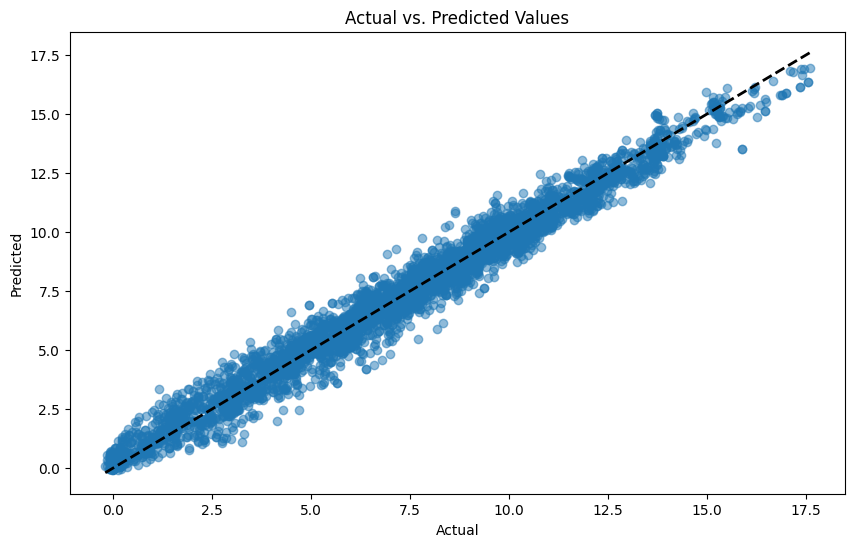

In [ ]:
# Actual vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_validation, predictions, alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()



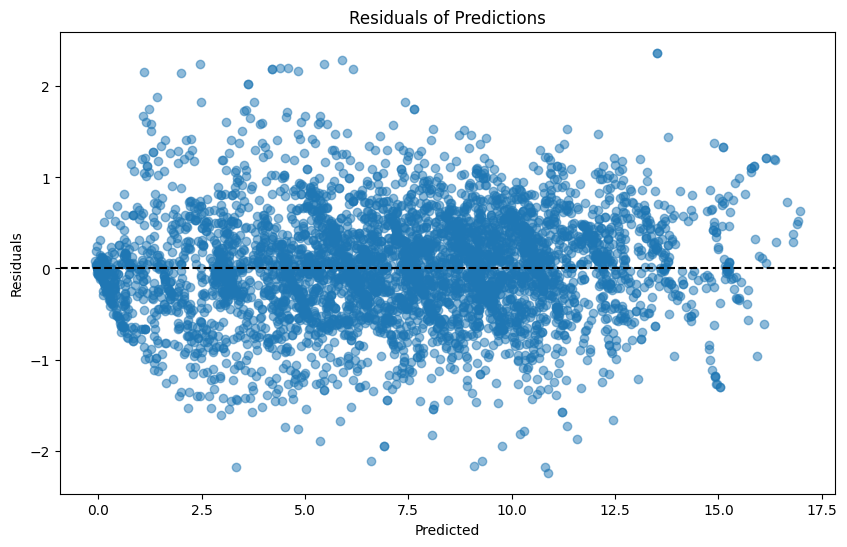

In [ ]:
# Residuals plot
residuals = y_validation - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

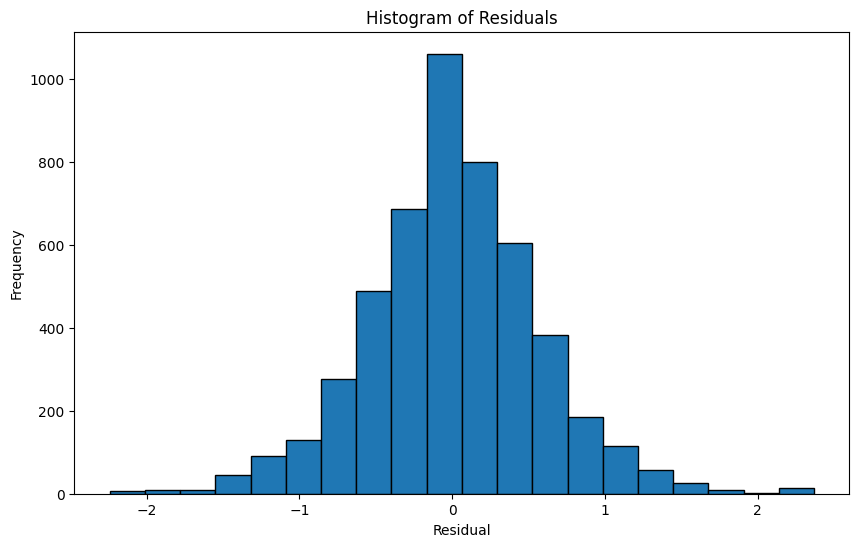

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
# Initializing the symbolic regressor
symbolic_regressor = SymbolicRegressor(population_size=5000,
                                       generations=20,
                                       stopping_criteria=0.01,
                                       p_crossover=0.7,
                                       p_subtree_mutation=0.1,
                                       p_hoist_mutation=0.05,
                                       p_point_mutation=0.1,
                                       max_samples=0.9,
                                       verbose=1,
                                       parsimony_coefficient=0.01,
                                       random_state=0)
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation and estimate MSE
def evaluate_model(model, X, y, cv=5):
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    mse = -mse_scores.mean()  # Correcting the placement of the minus sign here
    return mse

# Make sure your symbolic regressor model is defined: symbolic_regressor
# If not, initialize it here as done previously before calling this function

# Evaluate the current model setup using cross-validation
mse_cv = evaluate_model(symbolic_regressor, X_train, y_train, cv=5)
print(f"Cross-Validated MSE: {mse_cv}")

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.42      1.18433e+12        5         0.527528         0.544054      4.67m
   1    10.15           222.49       11         0.435467          0.44359      3.43m
   2     6.63          59.5328        5         0.424608         0.416242      2.28m
   3     2.26          58.3395        9         0.415261         0.403167      1.76m
   4     3.91          58.2576        9         0.413756         0.416712      1.96m
   5     5.58          695.207        9         0.410797         0.443339      1.59m
   6     5.22           19.506        5         0.416378         0.444784      1.70m
   7     5.27          7013.14        5         0.417407         0.435524      1.43m
   8     5.24          3427.05        5          0.41623         0.446116  

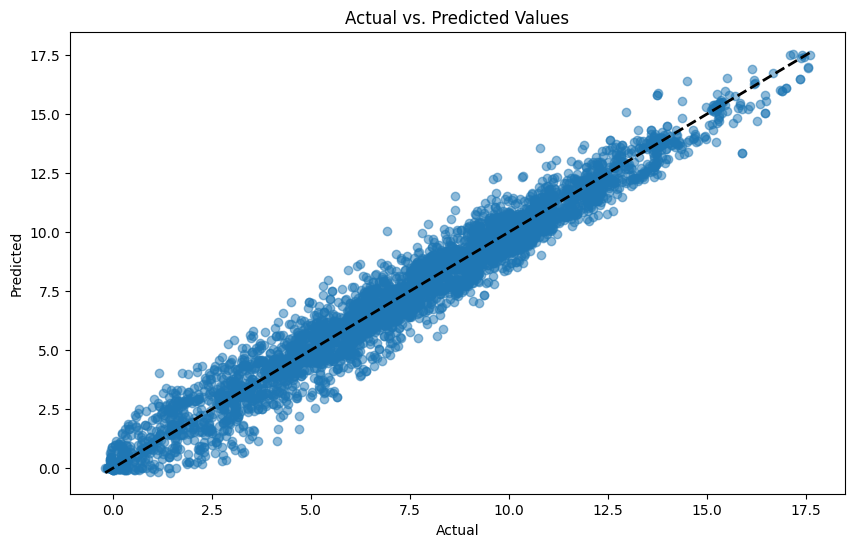

In [ ]:
# Actual vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_validation, predictions, alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()



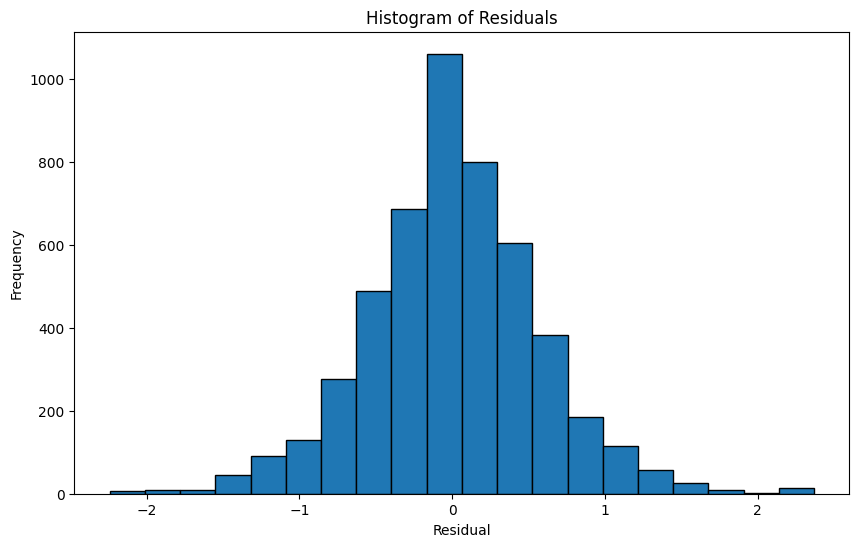

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

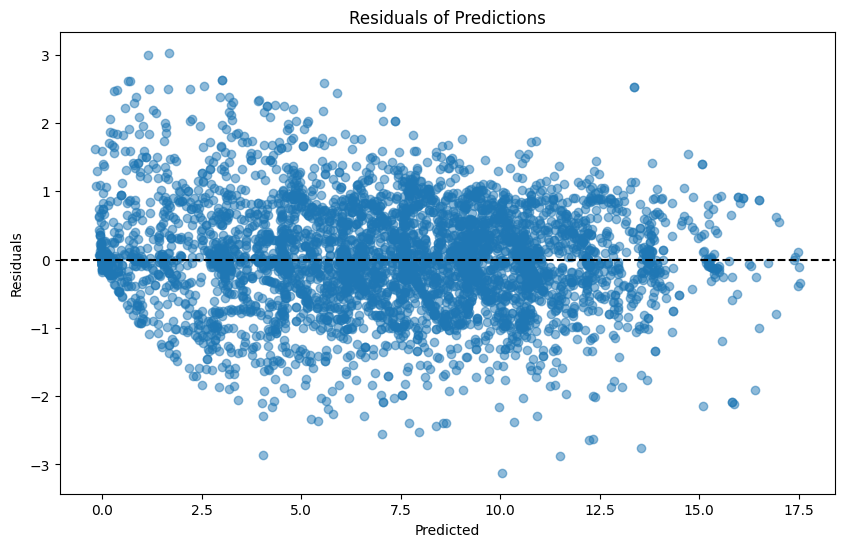

In [ ]:
# Residuals plot
residuals = y_validation - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

In [ ]:
#DSO Approach